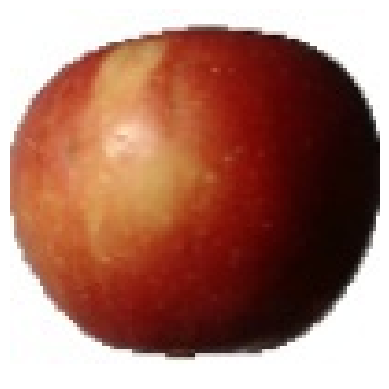

In [9]:
from keras.models import Sequential 
#Sequentical bir modeldir. Bunun üzerine mimari inşa edilir.Sıralı bir şekilde
#layerlar eklenir.Sequential sıralı bir model demektir. CNN mimraside 
#sıralı olarak gitmektedir.

from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
#Layerlar oluşturulacak. Bunun için 2 boyutlu resim üzerinde çalışacağız.
#Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense tanımladık.
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
#Resim datasını yüklemeliyiz ve data ile ilgili trainden önce yapılan işlemler var
#bu sebeple ImageDataGenerator, img_to_array, load_img fonksyionlarını import ettik
#mesale img_to_array resimler arraydir yani bir matris onları arraye çevrimek için
import matplotlib.pyplot as plt
from glob import glob
#kaç class olduğunu öğrenmek için: glob


train_path = "C://Users//UMUT//python//friut//fruits-360//Training/"
test_path = "C://Users//UMUT//python//friut//fruits-360//Test/"
#pathler verildi.fruits-360 dosyasının içerisinde bulunan Training dosyası path 
#olarak alındı.

img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

#görüntüleri yüklüyoruz load_imgte train_path değeri alındı 
#Training içerisinde Apple Braeburn dosyasından 0_100 görüntüsü gösterildi..


In [11]:
x = img_to_array(img)
print(x.shape)
#Resmi array e çevirdik. shape ni göstedik.
#(100,100,3) x,y =100,100 3 ise RGB'den gelir.

className = glob(train_path + '/*' )
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)
#train_path'e git / (içine gir) *(farklı gördüğün tüm isimleri al)
#çıktı 131 yani 131 farklı meyve var.

#%% CNN Model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
#filtre =32 adet
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))   #Dense= kaç layer?
model.add(Activation("relu"))
model.add(Dropout(0.5))   #Her seferinde 1024ün yarısını kapat 
model.add(Dense(numberOfClass)) # output sayısı class kadar olmalı
model.add(Activation("softmax")) #softmax kullanıyoruz çünkü multi categori

model.compile(loss = "categorical_crossentropy", #multi categori
              optimizer = "rmsprop",
              metrics = ["accuracy"])

batch_size = 32  #her bir iterasyonda 32 tane görüntü train edilecek.

#%% Data Generation - Train - Test
train_datagen = ImageDataGenerator(rescale= 1./255, #image 255 e bölündü.
                   shear_range = 0.3,  # sola kaydırıldı.
                   horizontal_flip=True, #random olarak sağ ve sola kaydırma
                   zoom_range = 0.3) #zoom yapıldı.

#Data içerisindekki görüntüler çoğaltıldı çünkü her classtaki  492 görüntü yeterli değil.
#Görüntülerde olmasını istenilen özellikler ImageDataGenerator ile verildi.


test_datagen = ImageDataGenerator(rescale= 1./255)
#normal data rescale edildiyse test datasıda reescale edimek zorundadır.

train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")
#flow_from_directory = train-path içindeki tüm görüntüleri ayrı ayrı bir classa atar.
#flow_from_directory path içindeki her classı ayırıp oluşturduğu her image de bu classa atıyor.
#target_size =x.shape[:2] sadece (100,100) almamızı sağlar. 
#color_mode = rgb channel
#class_mode = birden fazla class var 



test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")



hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=100,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

#model fit edildi
#steps_per_epoch = her bir epoch ta 1600//batch_size kadar iterasyon yap.
#validation_steps test_generator için steps belirlendi
#Normalde her classta 492 image vardı. Şimdi imagegenerator ile başka başka da imageler oldu
#sonucu elimizde tutmak için histe attık.

#%% model save
model.save_weights("deneme.h5")
#elde edilen sonuucu deneme.h5 ile kaydettik.




(100, 100, 3)
NumberOfClass:  131
Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Epoch 1/100


C:\Users\UMUT\AppData\Local\Temp\ipykernel_15296\2404082666.py:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


50/50 [==============================] - 7s 125ms/step - loss: 4.8555 - accuracy: 0.0175 - val_loss: 4.6574 - val_accuracy: 0.0213
Epoch 2/100
50/50 [==============================] - 6s 124ms/step - loss: 4.3306 - accuracy: 0.0538 - val_loss: 3.7317 - val_accuracy: 0.0900
Epoch 3/100
50/50 [==============================] - 6s 123ms/step - loss: 3.6635 - accuracy: 0.0969 - val_loss: 3.3923 - val_accuracy: 0.1300
Epoch 4/100
50/50 [==============================] - 6s 124ms/step - loss: 3.0909 - accuracy: 0.1787 - val_loss: 2.5283 - val_accuracy: 0.2812
Epoch 5/100
50/50 [==============================] - 6s 123ms/step - loss: 2.6310 - accuracy: 0.2650 - val_loss: 2.2030 - val_accuracy: 0.3850
Epoch 6/100
50/50 [==============================] - 6s 124ms/step - loss: 2.2419 - accuracy: 0.3587 - val_loss: 2.0535 - val_accuracy: 0.3450
Epoch 7/100
50/50 [==============================] - 6s 125ms/step - loss: 1.9737 - accuracy: 0.4087 - val_loss: 1.4115 - val_accuracy: 0.5913
Epoch 8/100

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


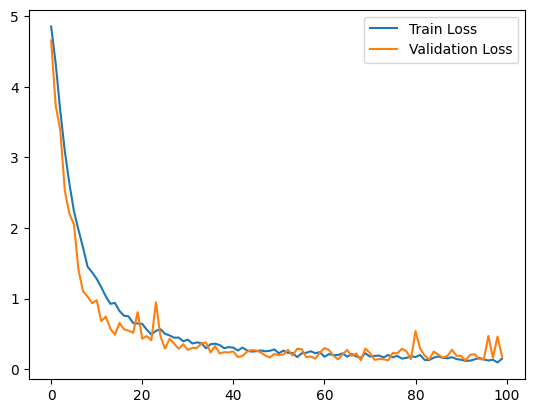

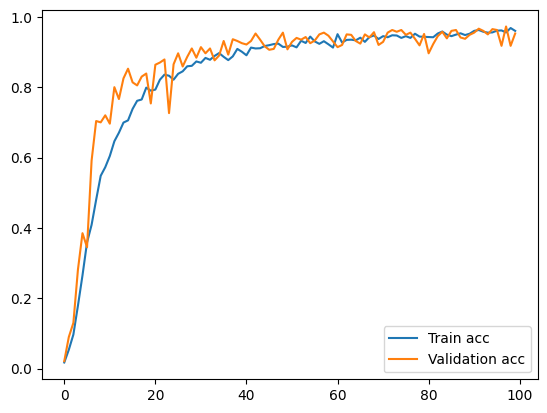

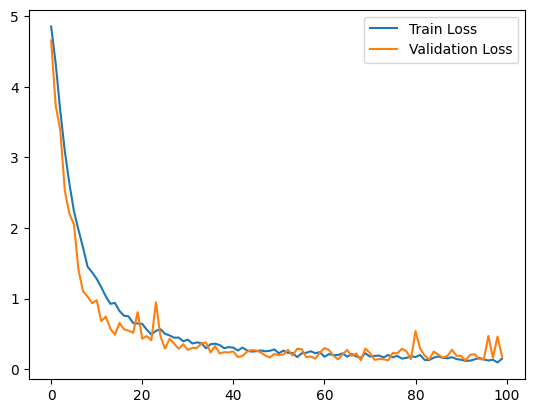

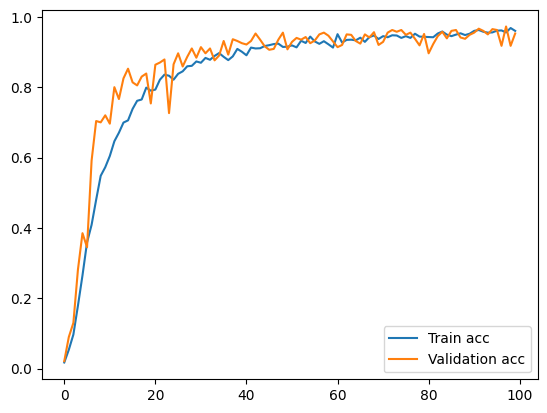

In [15]:

#%% model evaluation
#elde edilen değerleri görselleştirdik.
print(hist.history.keys()) #train, validation üzerinde elde edilen değerler.
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()


#%% save history
import json
with open("deneme.json","w") as f:
    json.dump(hist.history, f)

#sonuçları deneme.json olarak kaydettik.(cnn_fruit_hist)

#%% load history
import codecs
with codecs.open("deneme.json", "r",encoding = "utf-8") as f:
    h = json.loads(f.read())
plt.plot(h["loss"], label = "Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label = "Train acc")
plt.plot(h["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()   


# kaydedilen dosya tekrar açıldı ve çıkan sonuçlar incelendi.







